# Convert a Problem to Convex Optimization

[TOC]

In [1]:
from cvxopt import matrix, solvers
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### L1-norm

#### Raw problem

$$
\begin{aligned}
\min ~ & \| P u - q \|_1 \\
\mathrm{where} ~ &
P \in \mathbb{R}^{m \times n},
q \in \mathbb{R}^{m}, \mathrm{~is~the~problem~data} \\
& u \in \mathbb{R}^{n} \mathrm{~is~the~variable}
\end{aligned}
$$


#### Convex problem

$$
\begin{aligned}
\min ~ & \mathbf{1}' v \\
\mathrm{s.t.} ~ & \| Pu-q\| = v \\
\mathrm{where} ~ & v \in \mathbb{R}^{m}
\end{aligned}
$$
Looking at a simple case $\|u\|=v$ , which is a `V`-like curve whose minimum reaches at $0$.  we can **relax equalities to inequalities**, where the optima will hold. Here we convert a `V`-like curve to a `v`-like epigraph. In general, we convert the problem from **maximizing a function** to **minimizing the upper bound of a function**.
$$
\begin{aligned}
\min ~ & \mathbf{1}' v \\
\mathrm{s.t.} & \| Pu-q\| \preceq v
\end{aligned}
$$

Then we can easily derive the LP problem:
$$
\begin{aligned}
\min ~& 

\left[ \begin{matrix} \mathbf{0} \\ \mathbf{1} \end{matrix} \right] '
\left[ \begin{matrix} u \\ v \end{matrix} \right] \\ 

\mathrm{s.t.} &

\left[ \begin{matrix} P & -I \\ -P & -I \end{matrix} \right]

\left[ \begin{matrix} u \\ v  \end{matrix} \right]

\preceq

\left[ \begin{matrix} q \\ -q  \end{matrix} \right]

\end{aligned}
$$


Since we want to find a value to bound the maximum of $\|Pu-q\|$, we can also employ two variables $s$ and $t$, since $\|Pu-q\|=\|s-t\|=\|t-s\|\le\|s+t\|$.
$$
\begin{aligned}
\min ~ & \mathbf{1}'(s + t) \\
\mathrm{s.t.} ~ & Pu-q = s - t \\
& s, t \in \mathbb{R}^m \succeq 0
\end{aligned}
$$
which means:
$$
\begin{aligned}
\min ~ & 
[\mathbf{0}', \mathbf{1}', \mathbf{1}']
\left[ \begin{matrix} u \\ s \\ t  \end{matrix} \right] 
\\

\mathrm{s.t.} 

& \left[ \begin{matrix} \mathbf{0} & & \\ & -\mathbf{1} & \\ & & -\mathbf{1} \end{matrix} \right] 

\left[ \begin{matrix}  u \\ s \\ t \end{matrix} \right]
\preceq 0 \\

& \left[ \begin{matrix}  P & -I & I \end{matrix} \right]
\left[ \begin{matrix} u \\ s \\ t \end{matrix} \right]
= q \\
&

\end{aligned}
$$


In [2]:
"""
lp(c, G, h, A=None, b=None, kktsolver=None, solver=None, primalstart=None, dualstart=None, **kwargs)
    Solves a pair of primal and dual LPs
    
        minimize    c'*x
        subject to  G*x + s = h
                    A*x = b
                    s >= 0
    
        maximize    -h'*z - b'*y
        subject to  G'*z + A'*y + c = 0
                    z >= 0.
"""

# problem definition
m = 80
n = 40
P = np.random.normal(size=(m, n))
q = np.random.normal(size=(m, 1))

# style-1
c = np.vstack(
    [np.zeros([n, 1]), 
    np.ones([m, 1])]
)
G = np.vstack(
    [np.hstack([P, -np.eye(m)]),
     np.hstack([-P, -np.eye(m)])]
)
h = np.vstack(
    [q, 
    -q]
)
solvers.lp(matrix(c), matrix(G), matrix(h))

# style-2
c = np.vstack(
    [np.zeros([n, 1]), 
    np.ones([m, 1]), 
    np.ones([m, 1])]
)
G = -np.eye(n + 2 * m)
G[:n, :n] = 0
h = np.zeros([n + 2 * m, 1])
A = np.hstack(
    [P, -np.eye(m), np.eye(m)]
)
b = q
solvers.lp(matrix(c), matrix(G), matrix(h), A=matrix(A), b=matrix(b))

pass

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4409e-16  2e+02  3e+00  3e-16  1e+00
 1:  2.5850e+01  2.5878e+01  4e+01  5e-01  1e-15  2e-01
 2:  3.7186e+01  3.7198e+01  1e+01  2e-01  1e-14  7e-02
 3:  4.0836e+01  4.0840e+01  4e+00  5e-02  2e-14  2e-02
 4:  4.1920e+01  4.1921e+01  1e+00  1e-02  3e-14  6e-03
 5:  4.2121e+01  4.2122e+01  4e-01  5e-03  1e-13  2e-03
 6:  4.2221e+01  4.2221e+01  8e-02  1e-03  4e-14  5e-04
 7:  4.2243e+01  4.2243e+01  6e-03  8e-05  1e-13  4e-05
 8:  4.2245e+01  4.2245e+01  7e-05  9e-07  7e-13  4e-07
 9:  4.2245e+01  4.2245e+01  7e-07  9e-09  6e-13  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  3.1364e-15  6.1182e-15  7e+02  3e+01  1e+00  1e+00
 1:  3.2172e+01  3.2747e+01  1e+02  7e+00  2e-01  8e-01
 2:  3.9589e+01  3.9756e+01  3e+01  2e+00  6e-02  2e-01
 3:  4.1464e+01  4.1513e+01  8e+00  5e-01  2e-02  7e-02
 4:  4.2087e+01  4.2098e+01  2e+00  1e-01  5e-03  2e-02
 5:  4.2172e+01  4.2176e+01 

### LASSO

#### Raw problem

$$
\begin{aligned}
\min ~ & \| A x - b \|_2^2 + \|x\|_1 \\
\mathrm{where} ~ &
A \in \mathbb{R}^{m \times n},
b \in \mathbb{R}^{m}, \mathrm{~is~the~problem~data} \\
& x \in \mathbb{R}^{n} \mathrm{~is~the~variable}
\end{aligned}
$$


#### Convex problem

$$
\begin{aligned}
\min ~ & \| A x - b \|_2^2 + \mathbf{1}' v \\
\mathrm{s.t.} ~ & -v \preceq x \preceq v \in \mathbb{R}^n \\
\end{aligned}
$$

The term to minimize can be written as:

$$
\begin{aligned}
& \| A x - b \|_2^2 + \mathbf{1}' v  \\
= & (A x - b)' (Ax - b) + \mathbf{1}' v \\
= & x' A'A x - x'A'b - b'Ax + b'b + \mathbf{1}' v \\
= & x' A'A x - 2b'Ax + b'b + \mathbf{1}' v \\
= & 
\left[ \begin{matrix} x \\ v \end{matrix} \right] '
\left[ \begin{matrix} A'A & 0 \\ 0 & 0 \end{matrix} \right]
\left[ \begin{matrix} x \\ v \end{matrix} \right]
+
\left[ \begin{matrix} - 2 A' b \\ \mathbf{1} \end{matrix} \right]'
\left[ \begin{matrix} x \\ v \end{matrix} \right]
+
b'b
\end{aligned}
$$

The costraints can be written as:

$$
\begin{aligned}
\min ~ & \mathrm{above}
\\
\mathrm{s.t.} 
& \left[ \begin{matrix}
-I^n & I^n \\
I^n & I^n \\
\end{matrix} \right] 
\left[ \begin{matrix} 
x \\ v
\end{matrix} \right]
\preceq 0 \\
\end{aligned}
$$


In [3]:
"""
qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
"""

# problem definition
m = 80
n = 40
A = np.random.normal(size=(m, n))
b = np.random.normal(size=(m, 1))

P = np.vstack(
    [np.hstack([A.T @ A, np.zeros([n, n])]),
     np.hstack([np.zeros([n, n]), np.zeros([n, n])])]
) * 2
q = np.vstack(
    [-2 * A.T @ b,
    np.ones([n, 1])]
)
G = np.vstack(
    [np.hstack([-np.eye(n), -np.eye(n)]),
     np.hstack([np.eye(n), -np.eye(n)])]
)
h = np.zeros([2 * n, 1])
solvers.qp(matrix(P), matrix(q), matrix(G), matrix(h))


     pcost       dcost       gap    pres   dres
 0: -6.5419e+01 -4.2996e+01  5e+01  2e+01  3e-16
 1: -4.3612e+01 -4.2119e+01  4e+00  1e+00  3e-16
 2: -4.0285e+01 -4.0267e+01  5e-01  1e-01  2e-16
 3: -3.9928e+01 -3.9940e+01  4e-02  5e-03  2e-16
 4: -3.9918e+01 -3.9919e+01  1e-03  9e-05  2e-16
 5: -3.9918e+01 -3.9918e+01  2e-05  9e-07  1e-15
 6: -3.9918e+01 -3.9918e+01  2e-07  9e-09  3e-15
Optimal solution found.


{'x': <80x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <80x1 matrix, tc='d'>,
 'z': <80x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 2.0131850887537982e-07,
 'relative gap': 5.0432560985707574e-09,
 'primal objective': -39.91835927833069,
 'dual objective': -39.91835943861237,
 'primal infeasibility': 9.176114130310393e-09,
 'dual infeasibility': 2.9925539638674207e-15,
 'primal slack': 1.283046696742502e-10,
 'dual slack': 6.169024046964468e-10,
 'iterations': 6}

### SVM

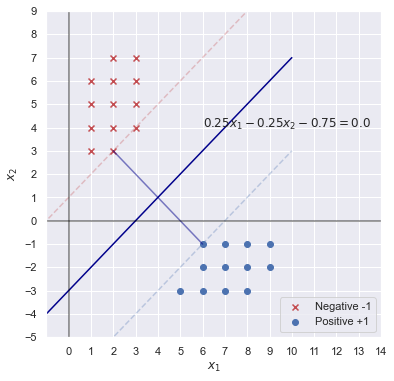

In [4]:
#Data set
x_neg = np.array([
    [2, 3], [3, 4], 
    [1, 3], [1, 4], [1, 5], [1, 6],
    [2, 4], [2, 5], [2, 6], [2, 7],
    [3, 5], [3, 6], [3, 7]
])
y_neg = np.ones([len(x_neg)])
x_pos = np.array([
    [6, -1], 
    [7, -1], [8, -1], [9, -1],
    [6, -2], [7, -2], [8, -2], [9, -2],
    [5, -3], [6, -3], [7, -3], [8, -3]
])
y_pos = - np.ones([len(x_pos)])
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))

#Plot
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='x', color='r', label='Negative -1')
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='b', label='Positive +1')
x1 = np.linspace(-10, 10)
plt.plot(x1, x1 - 3, color='darkblue')
plt.text(s='$0.25 x_1 - 0.25 x_2 - 0.75 = 0.0$', x=6, y=4)
plt.plot(x1, x1 - 7, linestyle='--', alpha=.3, color='b')
plt.plot(x1, x1 + 1, linestyle='--', alpha=.3, color='r')
plt.plot([2, 6], [3, -1], linestyle='-', color='darkblue', alpha=.5)

plt.xlim(-1, 9)
plt.ylim(-5, 5)
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(-5, 10, step=1))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axvline(0, color='black', alpha=.5)
plt.axhline(0, color='black', alpha=.5)
plt.legend(loc='lower right')
plt.show()

### SVM-Primal

#### Raw problem

$$
\begin{aligned}
\min ~ & \frac{1}{2} \| w \|^2 \\
\mathrm{s.t.} ~ & \forall i, ~ y^{(i)} \left(w'x^{(i)}+b \right) \ge 1
\end{aligned}
$$

#### Convex problem

The minimization term can be written as:
$$
\newcommand{\mat}[1]{\left[ \begin{matrix} #1 \end{matrix} \right]}


\begin{aligned}
\min ~ & \frac{1}{2}
\mat{ w \\ b }'
\mat{ \mathbf{I} & \mathbf{0} \\ \mathbf{0} & \mathbf{0} } 
\mat{ w \\ b }
\\

\end{aligned}
$$
The constraint term can be written as:
$$
\newcommand{\mat}[1]{\left[ \begin{matrix} #1 \end{matrix} \right]} \\ 

\begin{aligned}
\forall i, \left( y^{(i)} x^{(i)} \right)' w + y^{(i)} b & \ge 1 \\
(Y \circ X) w + Y b& \succeq \mathbf{1} 
\cdots X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m} \\
\mat{-Y \circ X, -Y} \mat{w \\ b} & \preceq  -\mathbf{1} 
\cdots \mathbb{R}^{m \times (n+1)} \cdot \mathbb{R}^{n+1}\\
\end{aligned}
$$



In [5]:
from cvxopt import matrix, solvers

m, n = X.shape
P = np.vstack(
    [np.hstack([np.eye(n), np.zeros([n, 1])]),
     np.hstack([np.zeros([1, n]), np.zeros([1, 1])])]
)
q = np.zeros([n + 1, 1]) 
G = - np.hstack(
    [y.reshape(m, 1) * X, y.reshape(m, 1)]
) + 0.0
h = - np.ones([m, 1])
result = solvers.qp(matrix(P), matrix(q), G=matrix(G), h=matrix(h))
w = result['x']
np.array(w)

     pcost       dcost       gap    pres   dres
 0:  2.4562e-02  2.4291e+00  4e+01  1e+00  1e+02
 1:  1.4812e-01 -2.1632e+00  2e+00  8e-02  8e+00
 2:  1.3979e-01  1.2164e-02  1e-01  4e-16  7e-16
 3:  6.4842e-02  4.8302e-02  2e-02  3e-16  1e-16
 4:  6.3093e-02  6.1346e-02  2e-03  2e-16  1e-15
 5:  6.2524e-02  6.2449e-02  8e-05  2e-16  2e-15
 6:  6.2503e-02  6.2497e-02  6e-06  2e-16  2e-14
 7:  6.2500e-02  6.2500e-02  8e-07  2e-16  2e-13
 8:  6.2500e-02  6.2500e-02  1e-07  2e-16  6e-12
 9:  6.2500e-02  6.2500e-02  2e-08  2e-16  1e-11
Optimal solution found.


array([[-0.24991618],
       [ 0.25008382],
       [ 0.74958091]])

### SVM-Dual

#### Raw problem

The dual problem is:
$$
\begin{aligned}
\max ~ & \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x_i'x_j \\
\mathrm{s.t.} ~ 
& \forall i, \alpha_i \ge 0 \\
& \sum_i \alpha_i y_i = 0
\end{aligned}
$$

#### Convex problem

The maximization term can be written as:
$$
\newcommand{\mat}[1]{\left[ \begin{matrix} #1 \end{matrix} \right]}

\begin{aligned}
& \max ~ \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x_i'x_j \\
= & \max ~ -\frac{1}{2} \alpha' (Y Y' \circ XX') \alpha + \mathbf{1}' \alpha \\
= & \min ~ \frac{1}{2} \alpha' (Y Y' \circ XX') \alpha - \mathbf{1}' \alpha 
\end{aligned}
$$
The constraint can be written as:
$$
\newcommand{\mat}[1]{\left[ \begin{matrix} #1 \end{matrix} \right]}

\begin{aligned}
Y' \alpha & = 0 \\
-I \alpha & \preceq \mathbf{0} \\
\end{aligned}
$$
We further have:
$$
\begin{aligned}
w & = \sum_i \alpha_i y_i x_i \\
b & = \frac{1 - y^{(s)}x^{(s)}w}{y^{(s)}} (\forall i\in \mathrm{support~set}, \mathrm{same~result}) \\
\end{aligned}
$$



In [6]:
P = (y.reshape(m, 1) @ y.reshape(1, m)) * (X @ X.T) + 0.0
q = -np.ones([m, 1])
A = y.reshape(1, m) + 0.0
b = np.zeros([1, 1])
G = -np.eye(m)
h = np.zeros([m, 1])
result = solvers.qp(matrix(P), matrix(q), G=matrix(G), h=matrix(h), A=matrix(A), b=matrix(b))

     pcost       dcost       gap    pres   dres
 0: -1.0515e+00 -1.5134e+00  4e+01  6e+00  1e+00
 1: -2.6964e-01 -1.8065e-01  2e+00  4e-01  8e-02
 2: -1.2164e-02 -1.3979e-01  1e-01  7e-17  2e-15
 3: -4.8302e-02 -6.4842e-02  2e-02  1e-17  4e-16
 4: -6.1346e-02 -6.3093e-02  2e-03  1e-17  3e-16
 5: -6.2449e-02 -6.2524e-02  8e-05  1e-17  3e-16
 6: -6.2497e-02 -6.2503e-02  6e-06  2e-17  3e-16
 7: -6.2500e-02 -6.2500e-02  8e-07  1e-17  3e-16
 8: -6.2500e-02 -6.2500e-02  1e-07  3e-17  3e-16
 9: -6.2500e-02 -6.2500e-02  2e-08  1e-17  3e-16
Optimal solution found.
